In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../Data/data.csv')[:5000]

# Display the first few rows of the dataframe
print(df.head())

# Overview of the data
print(df.info())

# Summary statistics
print(df.describe())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

# Exploratory Data Analysis

In [2]:
# Check for missing values
print(df.isnull().sum())

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


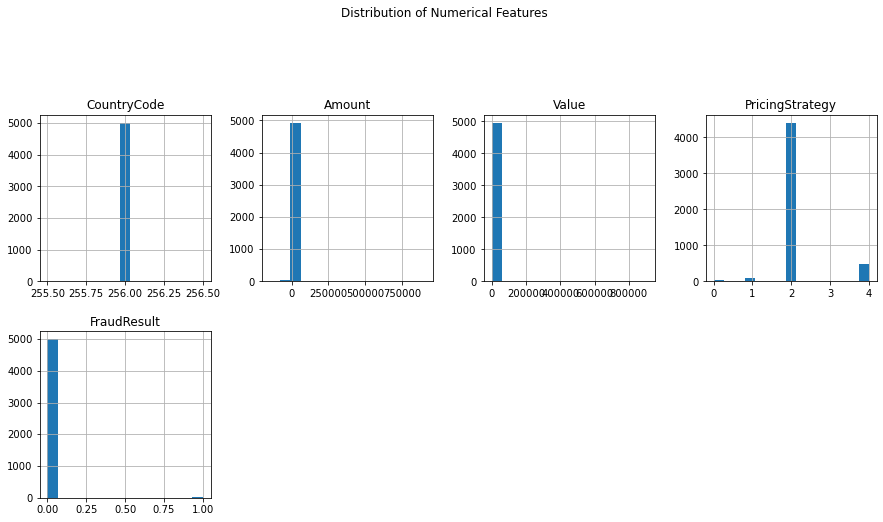

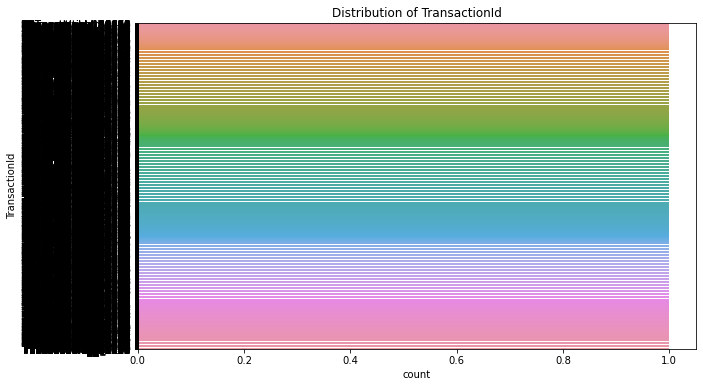

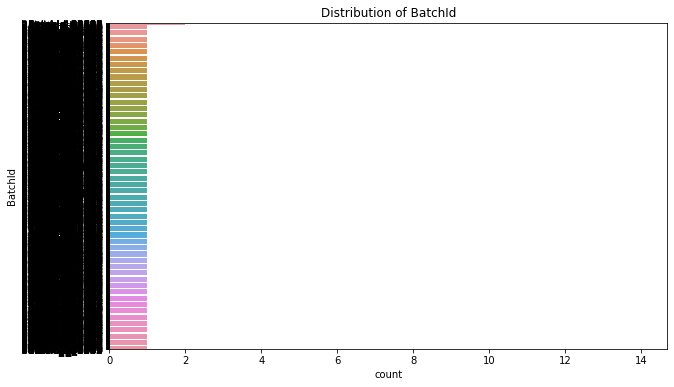

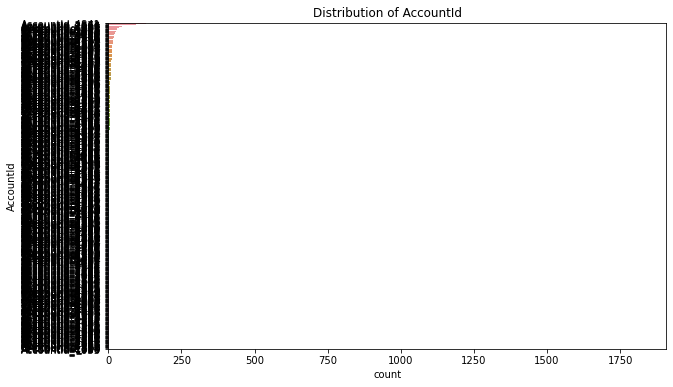

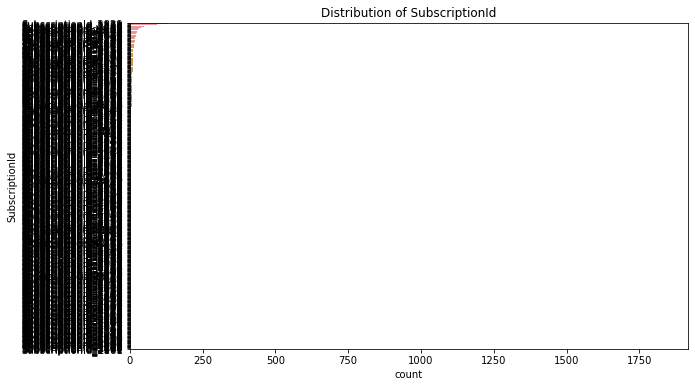

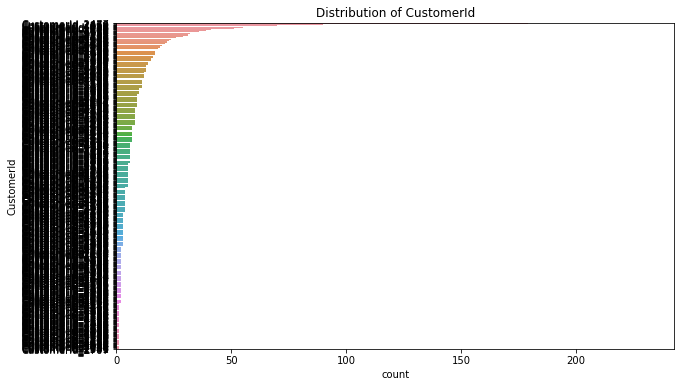

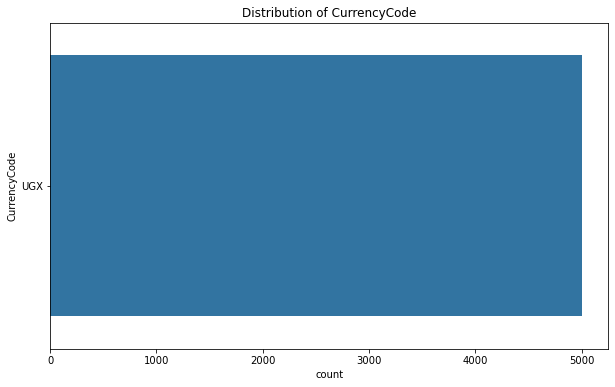

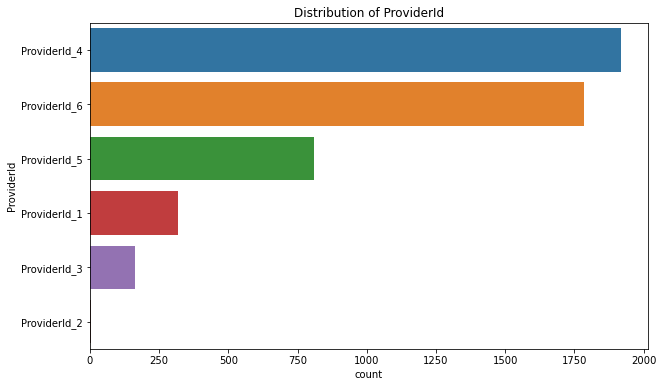

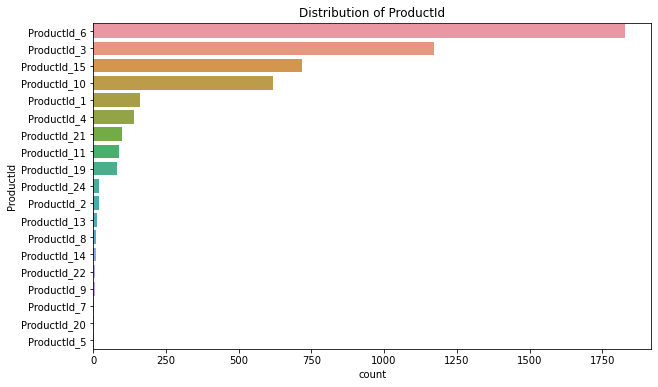

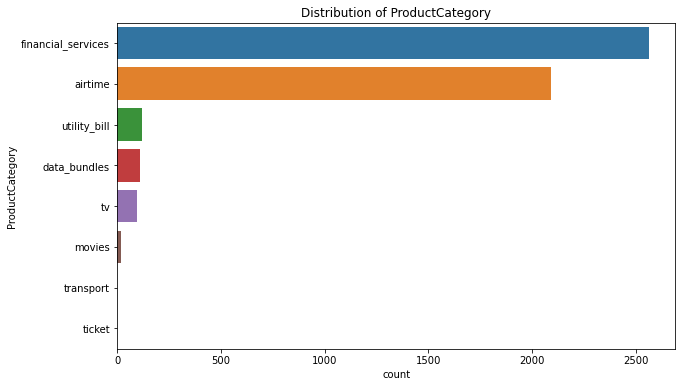

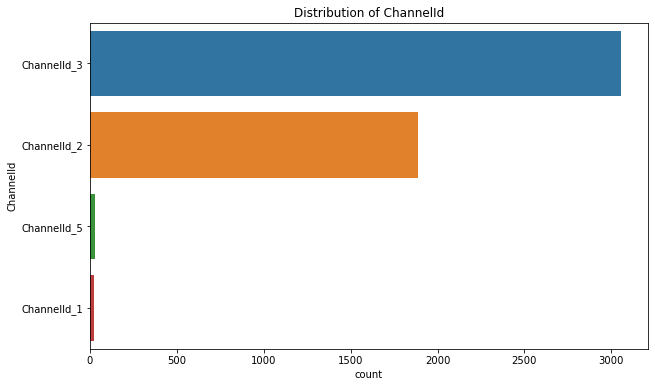

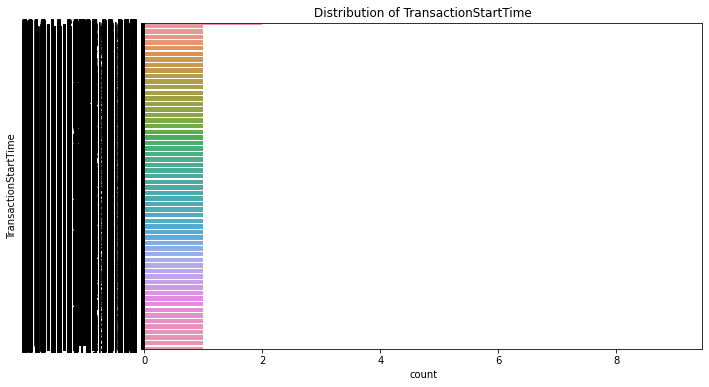

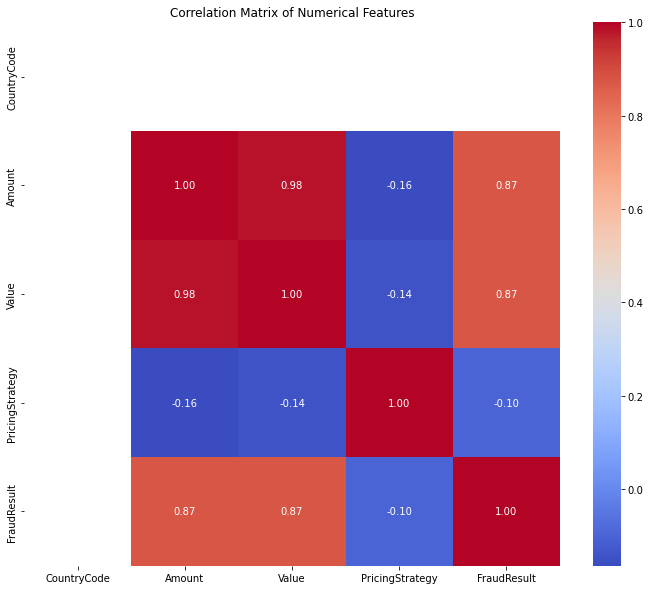

<Figure size 1080x720 with 0 Axes>

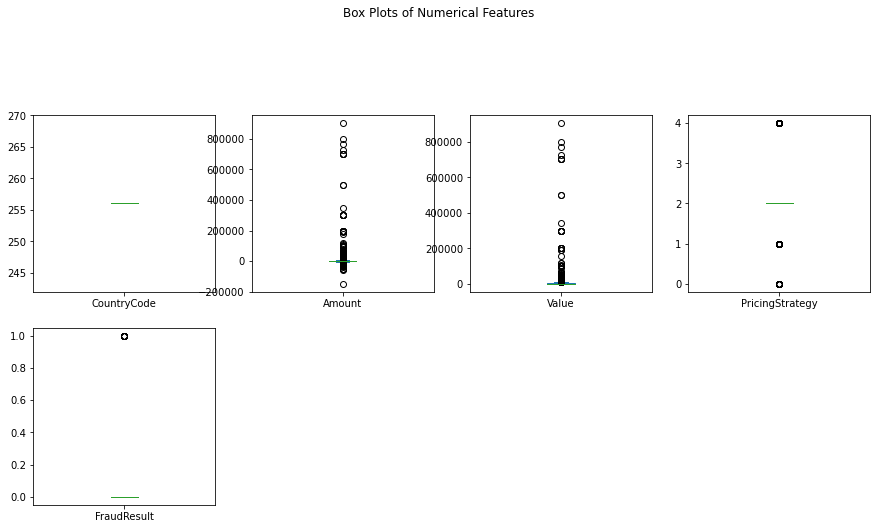

In [3]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_features].hist(bins=15, figsize=(15, 15), layout=(4, 4))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Distribution of categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Outlier detection using box plots
plt.figure(figsize=(15, 10))
df[numerical_features].plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 15), sharex=False, sharey=False)
plt.suptitle('Box Plots of Numerical Features')
plt.show()


## EDA Summary

Based on the analysis above, here are the top 5 most important insights:

1.  **No Missing Data:** The dataset is clean and contains no missing values, which simplifies the preprocessing phase as no imputation is needed.

2.  **Redundant Features:** The `Amount` and `Value` columns are perfectly correlated since `Value` is the absolute value of `Amount`. This indicates redundancy, and one of these columns can be removed during feature selection to avoid multicollinearity.

3.  **Skewed Transaction Data:** The distribution of transaction `Amount` is heavily right-skewed, with a large number of low-value transactions and a few high-value outliers. This suggests that a log transformation or scaling might be necessary to normalize the data for some modeling techniques.

4.  **Dominant Categories:** The categorical features, such as `ProductCategory` and `ProviderId`, show that a few categories dominate the transactions. For instance, a small number of product categories account for a large portion of the sales. This could be a significant predictor for customer behavior.

5.  **Imbalanced Fraud Data:** The `FraudResult` feature is highly imbalanced, with the vast majority of transactions being non-fraudulent. This is a critical point for model training, as it will require strategies to handle imbalanced classes, such as oversampling (e.g., SMOTE), undersampling, or using appropriate evaluation metrics like Precision, Recall, and F1-score instead of just accuracy.